<a href="https://colab.research.google.com/github/wanutchapornmun/229352-StatisticalLearning/blob/main/Lab06_SVM_660510561.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Support Vector Machines (SVM)

[SVM module documentation](https://scikit-learn.org/stable/modules/svm.html#svm)

[LinearSVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  # fast but only linear
from sklearn.svm import SVC  # slower but can do kernels

In [2]:
# Load the iris data
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

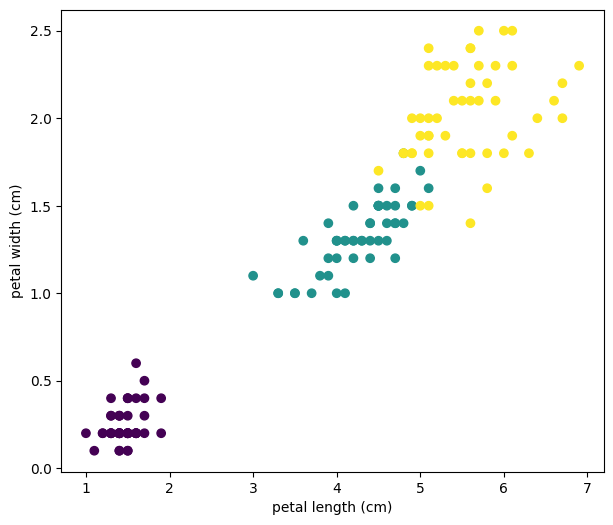

In [3]:
# Plot the data
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

#### In this problem, you'll use support vector machines to classify the Iris data

#### The following function helps you plot the decision boundary.

In [4]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

#### Exercise 1. Split the data into training set and test set.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

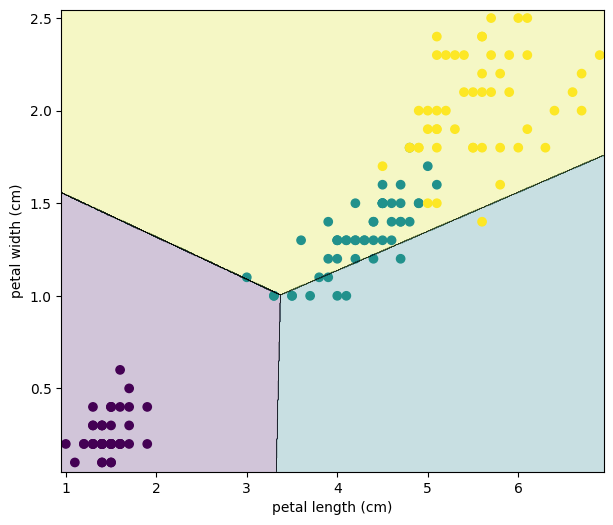

In [6]:
# linsvm
linsvm = LinearSVC(C=0.1)

linsvm.fit(X_train, y_train)

plot_decision_boundary(linsvm, X, y)

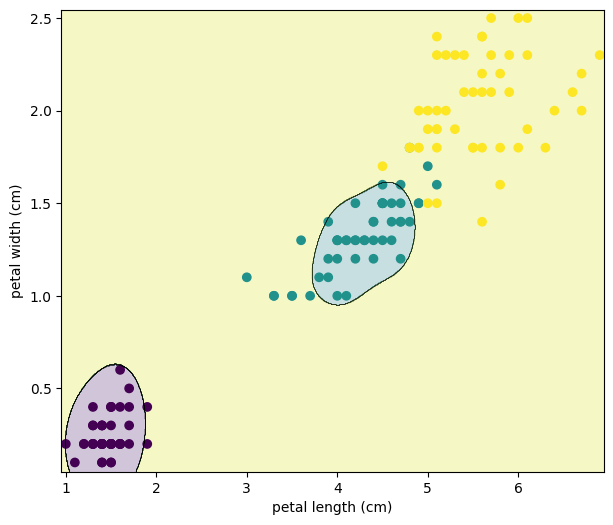

In [7]:
# svm
svm = SVC(C=0.1, kernel='rbf', gamma=10)

svm.fit(X_train, y_train)

plot_decision_boundary(svm, X, y)

#### Exercise 2. Learn a linear SVM classifier using sklearn.svm.LinearSVC. You will need to set `loss='hinge'`.

#### Try different values of the tradeoff parameter: `C = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `C` on the decision boundary?

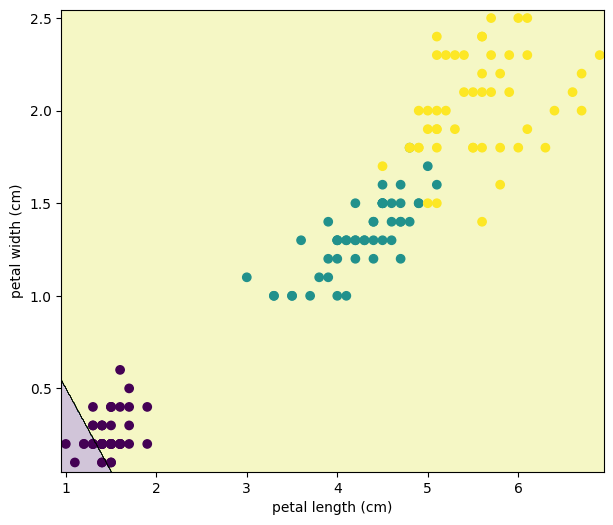

In [8]:
# C=0.01
linearsvc_1 = LinearSVC(C=0.01, loss='hinge')

linearsvc_1.fit(X_train, y_train)

plot_decision_boundary(linearsvc_1, X, y)

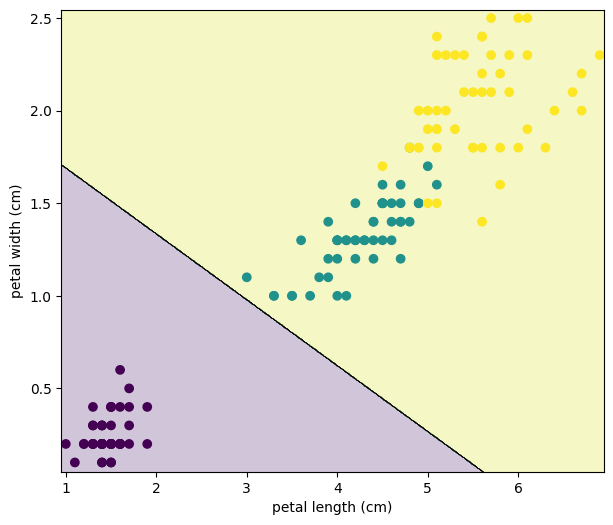

In [9]:
# C=0.1
linearsvc_2 = LinearSVC(C=0.1, loss='hinge')

linearsvc_2.fit(X_train, y_train)

plot_decision_boundary(linearsvc_2, X, y)

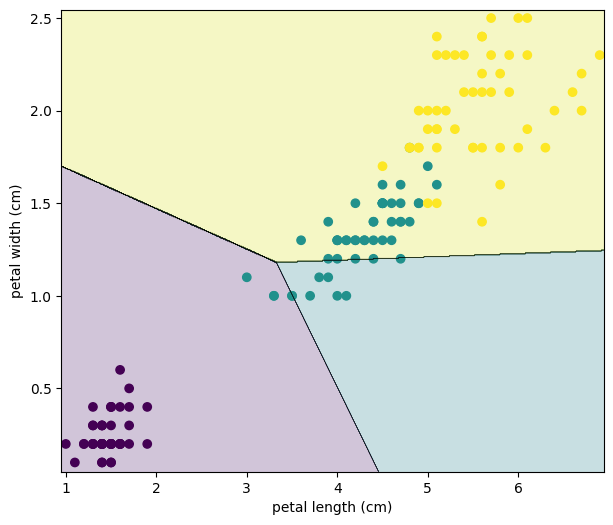

In [10]:
# C=1.0
linearsvc_3 = LinearSVC(C=1.0, loss='hinge', max_iter=100000)

linearsvc_3.fit(X_train, y_train)

plot_decision_boundary(linearsvc_3, X, y)

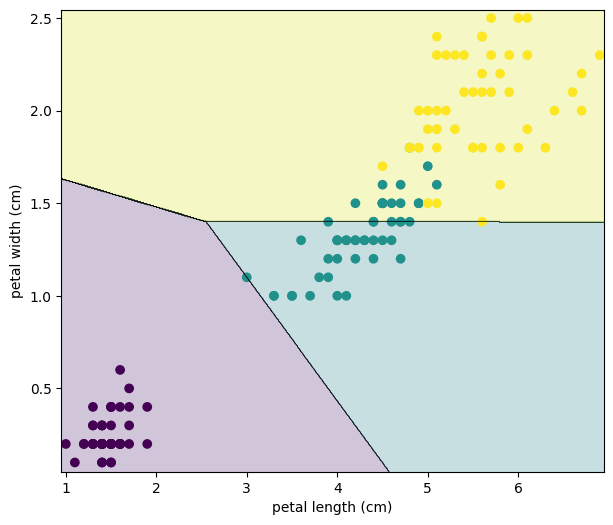

In [11]:
# C=10.0
linearsvc_4 = LinearSVC(C=10.0, loss='hinge', max_iter=100000)

linearsvc_4.fit(X_train, y_train)

plot_decision_boundary(linearsvc_4, X, y)

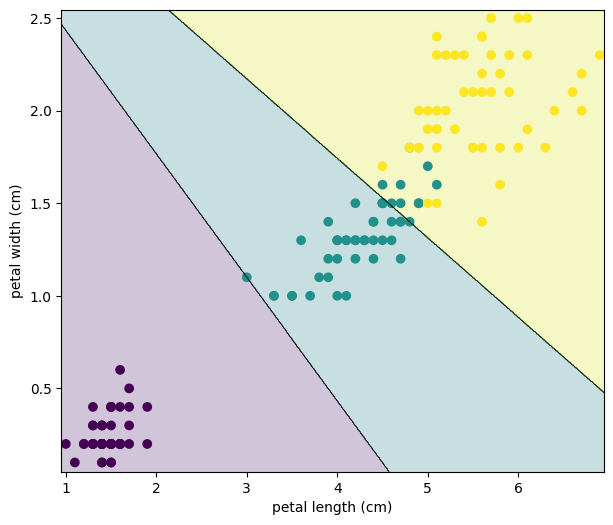

In [12]:
# C=100.0
linearsvc_5 = LinearSVC(C=100.0, loss='hinge', max_iter=100000)

linearsvc_5.fit(X_train, y_train)

plot_decision_boundary(linearsvc_5, X, y)

# What is the effect of C on the decision boundary?
- ถ้าค่า C มีค่ามาก: จะทำให้โมเดลพยายามแยกข้อมูลให้ถูกต้องมากขึ้น ส่งผลให้ margin แคบลง โมเดลมี bias ต่ำ variance สูง
- ถ้าค่า C มีค่าน้อย: ทำให้เส้นแบ่งการตัดสินใจ (decision boundary) เรียบและมี margin กว้างโมเดลมี bias สูง variance ต่ำ

#### Exercise 3. Pick a value of `C` that you like. Then report the test error.

In [31]:
from sklearn.metrics import classification_report
# C=100
ypred = linearsvc_5.predict(X_test)
print(classification_report(y_test, ypred))

test_error = 1 - linearsvc_5.score(X_test, y_test)
print("test error: ", test_error)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.71      0.83        21
           2       0.68      1.00      0.81        13

    accuracy                           0.87        45
   macro avg       0.89      0.90      0.88        45
weighted avg       0.91      0.87      0.87        45

test error:  0.1333333333333333



#### Exercise 4. Now try kernel SVM with a quadratic kernel. You can do this with sklearn.svm.SVC, setting `kernel='rbf'` and `C = 1.0`.

#### Try different values of the tradeoff parameter: `gamma = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `gamma` on the decision boundary?

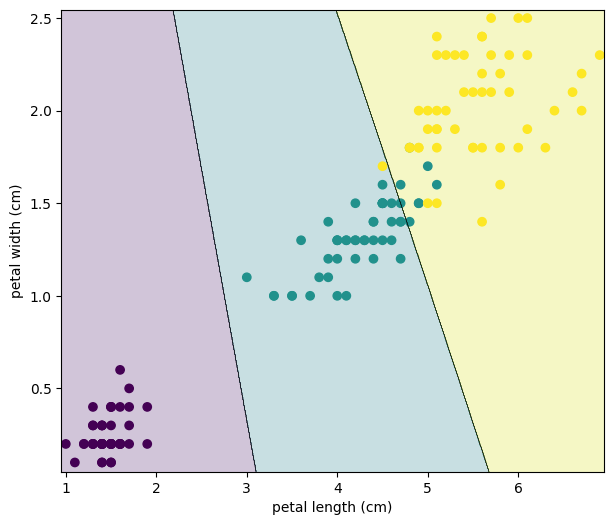

In [14]:
# gamma=0.01
svm_1 = SVC(C=1.0, kernel='rbf', gamma=0.01)

svm_1.fit(X_train, y_train)

plot_decision_boundary(svm_1, X, y)

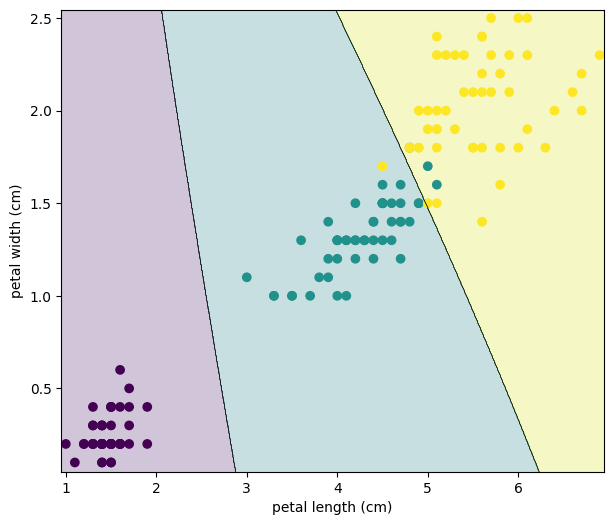

In [15]:
# gamma=0.1
svm_2 = SVC(C=1.0, kernel='rbf', gamma=0.1)

svm_2.fit(X_train, y_train)

plot_decision_boundary(svm_2, X, y)

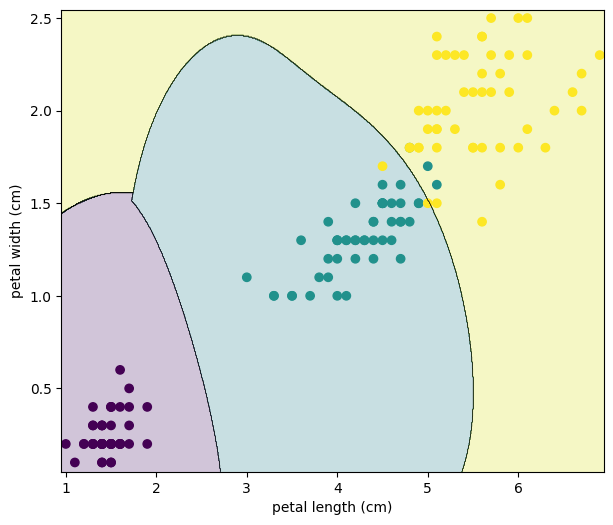

In [16]:
# gamma=1.0
svm_3 = SVC(C=1.0, kernel='rbf', gamma=1.0)

svm_3.fit(X_train, y_train)

plot_decision_boundary(svm_3, X, y)

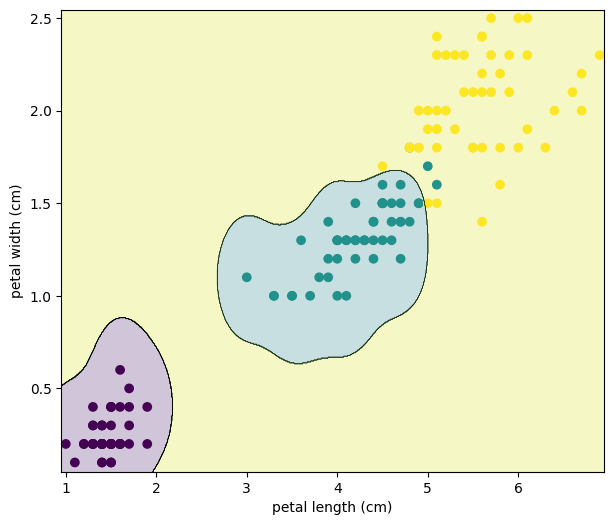

In [17]:
# gamma=10.0
svm_4 = SVC(C=1.0, kernel='rbf', gamma=10.0)

svm_4.fit(X_train, y_train)

plot_decision_boundary(svm_4, X, y)

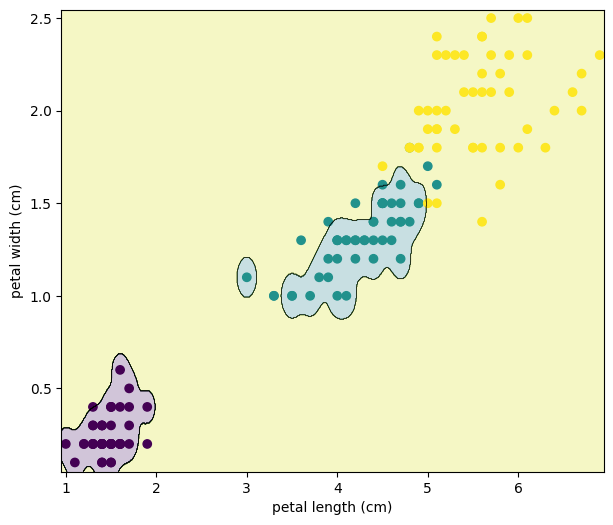

In [18]:
# gamma=100.0
svm_5 = SVC(C=1.0, kernel='rbf', gamma=100.0)

svm_5.fit(X_train, y_train)

plot_decision_boundary(svm_5, X, y)

# What is the effect of gamma on the decision boundary?
- ค่า gamma สูง: เส้น decision boundary จะซับซ้อนและคดเคี้ยวมาก (โมเดลพยายามโค้งเส้นให้ผ่านจุดข้อมูล) bias ต่ำ, variance สูง
- ค่า gamma ต่ำ: เส้น decision boundary จะเรียบและโค้งน้อย bias สูง, variance ต่ำ

#### Exercise 5. Pick a value of `gamma` that you like. Then report the test error and the number of support vectors.

In [36]:
from sklearn.metrics import classification_report
# gramma=10.0
ypred_1 = svm_4.predict(X_test)
print(classification_report(y_test, ypred_1))

test_error_svm = 1 - svm_4.score(X_test, y_test)
print("test error: ", test_error_svm)
print("number of support vectors: ", len(svm_4.n_support_))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.86      0.92        21
           2       0.81      1.00      0.90        13

    accuracy                           0.93        45
   macro avg       0.94      0.95      0.94        45
weighted avg       0.95      0.93      0.93        45

test error:  0.06666666666666665
number of support vectors:  3


#### Exercise 6. Between Linear SVM and Kernel SVM, which model would you prefer to use for classification of Iris data?
1. Explain using test accuracy
2. Explaing using decision boundary plot

1. Linear SVM (C = 100)
- Accuracy = 0.87
- Test error = 0.1333

Kernel SVM (gamma = 10)
- Accuracy = 0.93
- Test error = 0.0667
- จำนวน support vectors = 3

จะเห็นได้ว่า Kernel SVM ให้ความแม่นยำบนชุดทดสอบสูงกว่า และมี test error ต่ำกว่า Linear SVM
ดังนั้น จึงเลือก Kernel SVM

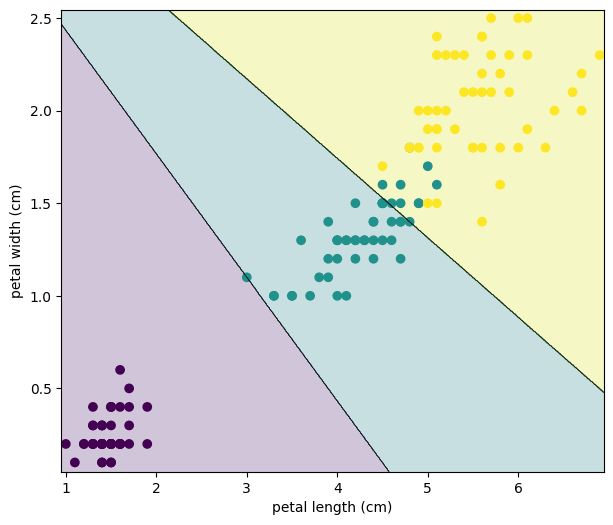

In [37]:
# C=100.0
linearsvc_5 = LinearSVC(C=100.0, loss='hinge', max_iter=100000)

linearsvc_5.fit(X_train, y_train)

plot_decision_boundary(linearsvc_5, X, y)

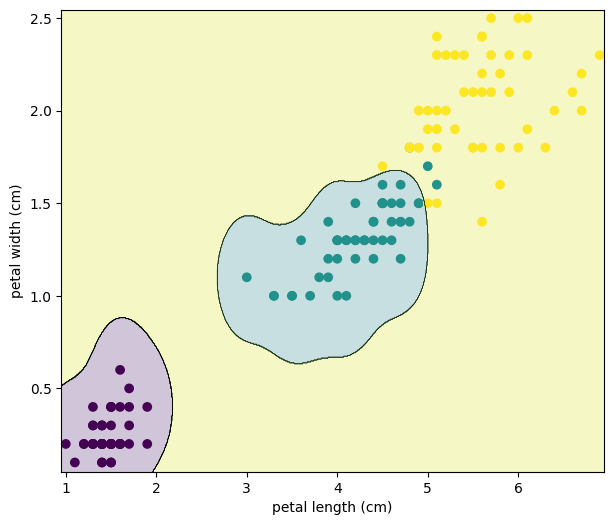

In [38]:
# gamma=10.0
svm_4 = SVC(C=1.0, kernel='rbf', gamma=10.0)

svm_4.fit(X_train, y_train)

plot_decision_boundary(svm_4, X, y)

2. จากกราฟ Decision Boundary Plot พบว่า Kernel SVM สามารพจำแนกข้อมูล Iris data ได้ดีกว่า Linear SVM เนื่องจาก Kernel SVM มีข้อมูลที่แบ่งกลุ่มผิดน้อยกว่า Linear SVM